/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


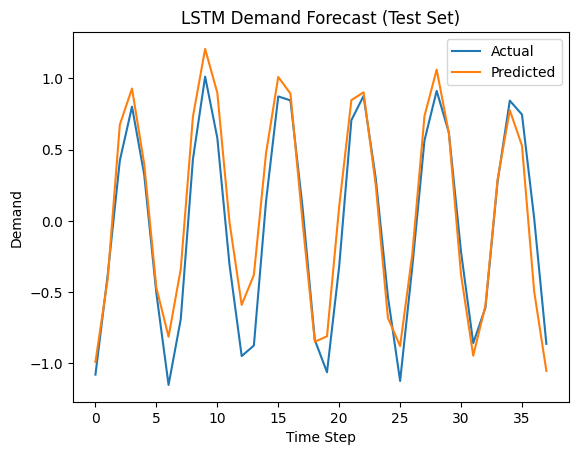

Test MSE Loss: 0.0516


In [ ]:
#RNN (LSTM) for Time Series Demand Forecasting (TensorFlow + Line Plot)
#Scenario: Forecast weekly product demand with an LSTM network to capture temporal trends.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. DATA GENERATION
data = np.sin(np.arange(200)) + np.random.randn(200)*0.1  # Synthetic timeseries
sequence_length = 10

X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM expects [samples, timesteps, features]

# Train/Test split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 2. MODEL BUILD
model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 3. TRAINING
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=0)

# 4. EVALUATION
loss = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

# 5. VISUALIZATION: Actual vs. Predicted Demand
plt.figure()
plt.plot(y_test, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.title("LSTM Demand Forecast (Test Set)")
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.legend()
plt.show()

print(f"Test MSE Loss: {loss:.4f}")